<center>
<h1>Name: Nader Mohamed Elhadedy</h1>
<h1>Task: Churn Prediction</h1>
</center>

---

# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Read Data

In [ ]:
data_path = 'https://raw.githubusercontent.com/naderelhadedy/churn_modeling_dataset/main/churn_modeling.csv'
raw_df = pd.read_csv(data_path)
df = raw_df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

# Explore Data

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.sample(1).iloc[0]

RowNumber               162
CustomerId         15641122
Surname                 Wei
CreditScore             684
Geography            France
Gender                 Male
Age                      30
Tenure                    2
Balance                   0
NumOfProducts             2
HasCrCard                 1
IsActiveMember            0
EstimatedSalary     83473.8
Exited                    0
Name: 161, dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
string_cols = df.select_dtypes('object').columns
for col in string_cols:
  print(f'Unique values in {col}: {len(np.unique(df[col]))}')

Unique values in Surname: 2932
Unique values in Geography: 3
Unique values in Gender: 2


In [ ]:
num_cols = df.select_dtypes(['int', 'float']).columns
for col in num_cols:
  print(f'Unique values in {col}: {len(np.unique(df[col]))}')

Unique values in RowNumber: 10000
Unique values in CustomerId: 10000
Unique values in CreditScore: 460
Unique values in Age: 70
Unique values in Tenure: 11
Unique values in Balance: 6382
Unique values in NumOfProducts: 4
Unique values in HasCrCard: 2
Unique values in IsActiveMember: 2
Unique values in EstimatedSalary: 9999
Unique values in Exited: 2


# Prepare and Split Data

In [ ]:
new_feats = df[num_cols]
feats, target = new_feats.iloc[:,2:-1], new_feats.iloc[:,-1]

In [ ]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X = feats.copy()
y = target.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
X_train.shape

(7000, 8)

In [ ]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

---

# Import Keras functions

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

In [ ]:
tf.random.set_seed(42)

# Build model architecture

In [ ]:
model = Sequential([Flatten(input_shape=(X_train.shape[1],), name='input'),
                    BatchNormalization(name='batch_norm1'),
                    Dense(25, activation=tf.nn.relu, name='hidden_layer1'),
                    BatchNormalization(name='batch_norm2'),
                    Dense(25, activation=tf.nn.relu, name='hidden_layer2'),
                    BatchNormalization(name='batch_norm3'),
                    Dense(1, activation=tf.nn.sigmoid, name='output')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 8)                 0         
                                                                 
 batch_norm1 (BatchNormaliza  (None, 8)                32        
 tion)                                                           
                                                                 
 hidden_layer1 (Dense)       (None, 25)                225       
                                                                 
 batch_norm2 (BatchNormaliza  (None, 25)               100       
 tion)                                                           
                                                                 
 hidden_layer2 (Dense)       (None, 25)                650       
                                                                 
 batch_norm3 (BatchNormaliza  (None, 25)               1

# Complie and train model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
197/197 [==============================] - 2s 4ms/step - loss: 0.5692 - accuracy: 0.7130 - val_loss: 0.4680 - val_accuracy: 0.8186
Epoch 2/20
197/197 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.8259 - val_loss: 0.3986 - val_accuracy: 0.8329
Epoch 3/20
197/197 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8392 - val_loss: 0.3877 - val_accuracy: 0.8329
Epoch 4/20
197/197 [==============================] - 1s 3ms/step - loss: 0.3854 - accuracy: 0.8410 - val_loss: 0.3774 - val_accuracy: 0.8371
Epoch 5/20
197/197 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8430 - val_loss: 0.3775 - val_accuracy: 0.8371
Epoch 6/20
197/197 [==============================] - 1s 3ms/step - loss: 0.3791 - accuracy: 0.8421 - val_loss: 0.3799 - val_accuracy: 0.8400
Epoch 7/20
197/197 [==============================] - 1s 3ms/step - loss: 0.3755 - accuracy: 0.8451 - val_loss: 0.3791 - val_accuracy: 0.8386
Epoch 

# Visualize Loss & Accuracy

In [ ]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

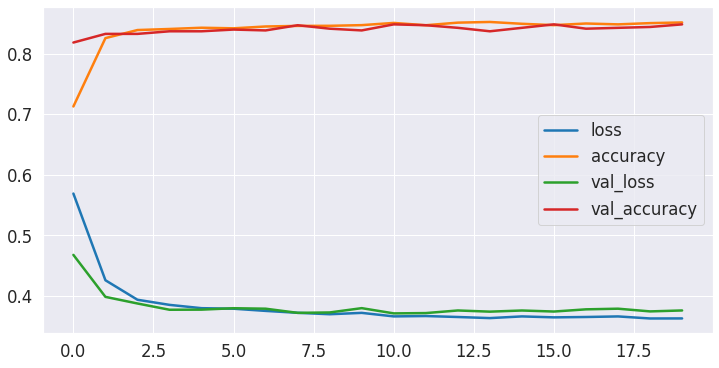

In [ ]:
learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(12,6))
plt.show()

# Evaluate test data

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print("Accuracy on the test data is {}".format(evaluation[1]*100))

94/94 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8610
Accuracy on the test data is 86.10000014305115


# View the neural network

In [ ]:
model.save('model.h5')

<center>
<h3>Using netron.app</h3>

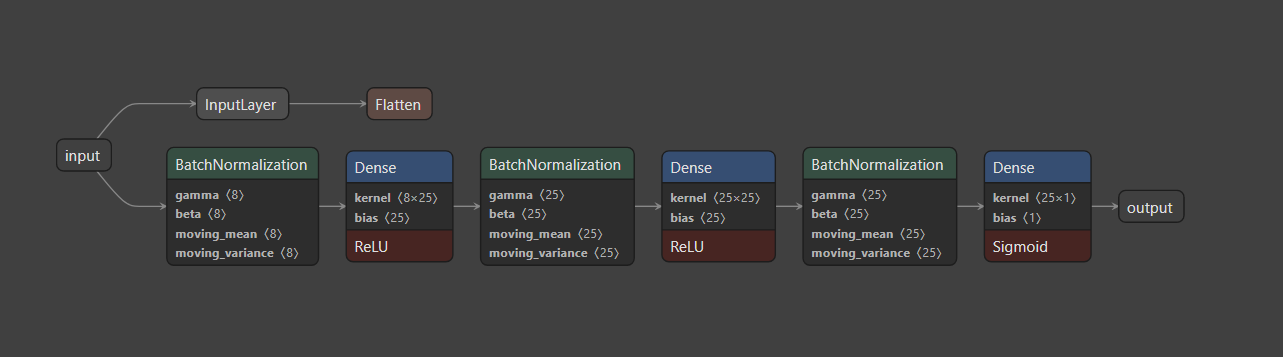

</center>